In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [ ]:
cd MyDrive/My Drive/LearningSpoons_CV

/content/MyDrive/My Drive/LearningSpoons_CV


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Activation, add, Flatten, GlobalAveragePooling2D, Reshape, multiply
from keras.models import Model

import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


width = 32
height = 32

# cifar data download
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# data feeding
# trdata = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, validation_split=0.2)

# traindata = trdata.flow_from_directory(directory="./dogsandcats",target_size=(32,32),subset='training')
# testdata = trdata.flow_from_directory(directory="./dogsandcats",target_size=(32,32),subset='validation')

Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [ ]:
y_train.shape

(50000, 1)

In [ ]:
num_classes = 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
validation_images, validation_labels = x_train[:500], y_train[:500]
train_images, train_labels = x_train[500:], y_train[500:]

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
def Residual_Block(x, filter):

    x_skip = x 
    f= filter

    x = Conv2D(f, kernel_size=(3,3), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(f, kernel_size=(3,3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x_skip = Conv2D(f, kernel_size=(1,1),strides=(1,1),padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)    


    x = add([x, x_skip])
    x = Activation('relu')(x)    
    
    return x


In [ ]:
def Residual_Block_50(x, filters):
    f1, f2 = filters
    x_skip = x # 초기의 x

    x = Conv2D(f1, kernel_size=(1,1), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f1, kernel_size=(3,3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size=(1,1), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    #scale
    x_skip = Conv2D(f2, kernel_size=(1,1),strides=(1,1),padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)    

    #skip connection
    x = add([x, x_skip])
    x = Activation('relu')(x)    
    
    return x

https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/applications/resnet.py

In [ ]:

inputs = Input(shape=(32,32,3))
x = Conv2D(64, kernel_size=7, strides=2, padding='valid')(inputs)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

for i in range(3):
  x = Residual_Block_50(x, filters=(64,256)) 

for i in range(4):
  x = Residual_Block_50(x, filters =(128,512)) 

for i in range(6):
  x = Residual_Block_50(x, filters =(256,1024)) 

for i in range(3):
  x = Residual_Block_50(x, filters =(512,2048)) 



# x = Residual_Block(x, filter = 64)
# x = Residual_Block(x, filter = 64)

# x = Residual_Block(x, filter = 128)
# x = Residual_Block(x, filter = 128)

# x = Residual_Block(x, filter = 256)
# x = Residual_Block(x, filter = 256)

# x = Residual_Block(x, filter = 512)
# x = Residual_Block(x, filter = 512)


x = GlobalAveragePooling2D()(x) 

outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 13, 13, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 7, 7, 64)     0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 64)     4160        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [ ]:
history = model.fit(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1547/1547 [==============================] - 281s 145ms/step - loss: 2.1619 - accuracy: 0.2410 - val_loss: 1.5580 - val_accuracy: 0.4560
Epoch 2/10
1547/1547 [==============================] - 217s 140ms/step - loss: 1.6034 - accuracy: 0.4141 - val_loss: 1.3975 - val_accuracy: 0.4820
Epoch 3/10
1547/1547 [==============================] - 217s 140ms/step - loss: 1.4320 - accuracy: 0.4871 - val_loss: 1.4247 - val_accuracy: 0.4900
Epoch 4/10
1547/1547 [==============================] - 217s 140ms/step - loss: 1.2998 - accuracy: 0.5335 - val_loss: 1.3318 - val_accuracy: 0.5240
Epoch 5/10
1547/1547 [==============================] - 216s 140ms/step - loss: 1.1908 - accuracy: 0.5797 - val_loss: 1.2041 - val_accuracy: 0.5460
Epoch 6/10
1547/1547 [==============================] - 217s 140ms/step - loss: 1.0890 - accuracy: 0.6138 - val_loss: 1.2231 - val_accuracy: 0.5920
Epoch 7/10
1547/1547 [==============================] - 217s 140ms/step - loss: 1.0093 - accuracy: 0.6485 - val_

In [ ]:
# custom data feeding
#history = model.fit(traindata, epochs = 20,   validation_data=testdata)

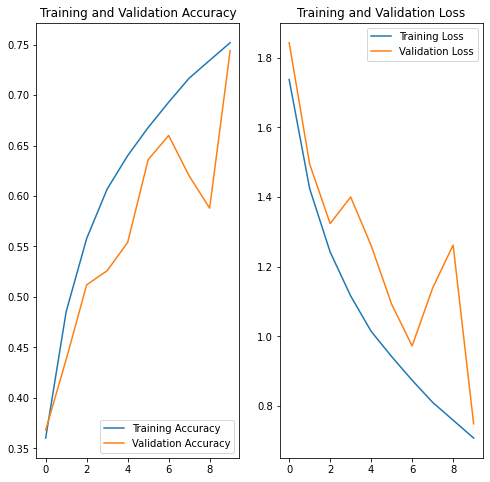

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()